# Exploring Dandiset 001359: Human Patch-seq Data

**Note:** This notebook was generated by an AI and has not been fully verified. Users should exercise caution when interpreting the code or results and are encouraged to independently verify any critical findings.

## Dandiset Overview

This notebook explores Dandiset 001359, titled "20250331_AIBS_Patchseq_human", version 0.250401.1603. This dataset contains Patch-seq data from human subjects, including intracellular electrophysiology recordings.

You can find more information about this Dandiset on the DANDI Archive: https://dandiarchive.org/dandiset/001359/0.250401.1603

## Notebook Summary

This notebook will demonstrate how to:
1. Load the Dandiset using the DANDI API.
2. Access and explore an NWB file within the Dandiset.
3. Load and visualize intracellular electrophysiology data (voltage/current traces and stimuli) from the NWB file.

## Required Packages

This notebook requires the following packages:
- `itertools`
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dandiset

We will connect to the DANDI archive and access the specified Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Exploring an NWB File

We will now load a specific NWB file from the Dandiset and examine its contents.

The chosen NWB file is: `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/`

You can explore this NWB file further on NeuroSift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft

In [3]:
# Load the specific NWB file
url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Show some basic metadata from the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session description: PLACEHOLDER
Session start time: 2022-09-06 17:44:39.146000+00:00
Subject ID: 1203384279
Subject species: Homo sapiens
Subject sex: M
Subject age: P21170.0D


## NWB File Contents Summary

The selected NWB file contains intracellular electrophysiology data from a human subject. Key components include:

*   **`icephys_electrodes`**: Information about the recording electrode (Headstage 0).
*   **`acquisition`**: Recorded voltage or current data series (`VoltageClampSeries`, `CurrentClampSeries`).
*   **`stimulus`**: Applied stimulus data series (`VoltageClampStimulusSeries`, `CurrentClampStimulusSeries`).
*   **`processing/spikes`**: Detected spike times (Note: The shapes shown indicate these datasets might be empty for some sweeps).
*   **`intervals/epochs`**: Time intervals defining experimental epochs.
*   **`devices`**: Information about the recording device (Harvard Bioscience ITC18USB).
*   **`sweep_table`**: A table grouping different PatchClampSeries by sweep number.

## Visualizing Electrophysiology Data

We will now load and visualize some of the acquired and stimulus data from the NWB file. We'll focus on `data_00005_AD0` (CurrentClampSeries) and `data_00005_DA0` (CurrentClampStimulusSeries) as an example.

Loaded 182375 data points from data_00005_AD0.
Data unit: volts
Stimulus unit: amperes


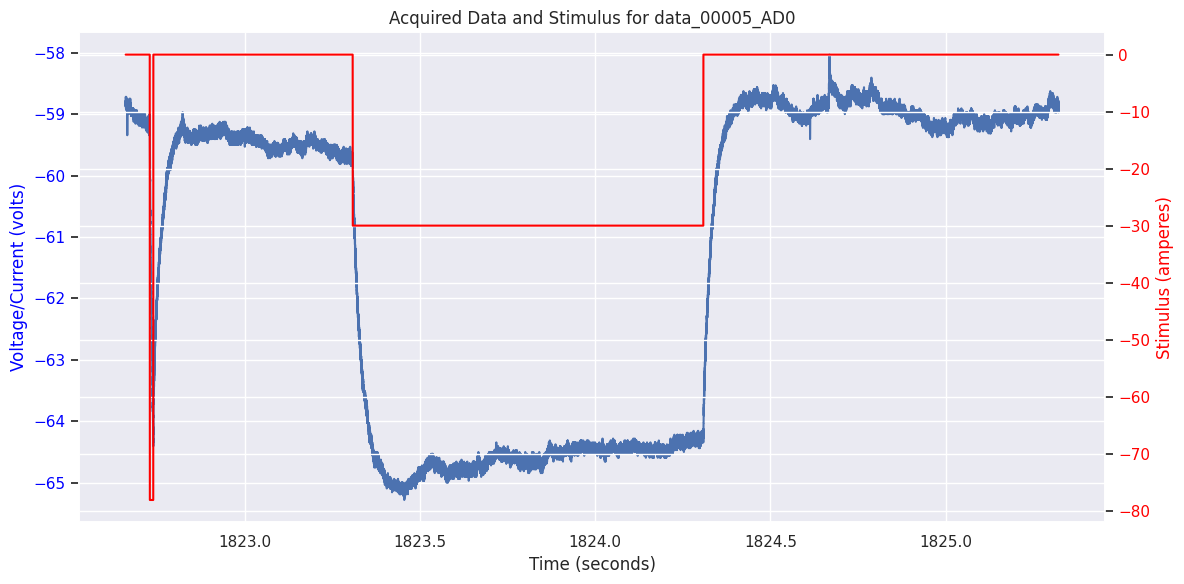

In [4]:
# Set seaborn theme for better plot aesthetics
import seaborn as sns
sns.set_theme()

# Get the data and stimulus series
try:
    acquisition_series = nwb.acquisition["data_00005_AD0"]
    stimulus_series = nwb.stimulus["data_00005_DA0"]

    # Get data and timestamps - only load a subset if the dataset is large
    # Check shape to avoid loading excessive data
    if acquisition_series.data.shape[0] > 1000000: # Example threshold, adjust as needed
        print("Loading a subset of data due to large size.")
        # Load first 1000000 points and corresponding timestamps
        data = acquisition_series.data[:1000000]
        # Calculate timestamps for the subset
        dt = 1.0 / acquisition_series.rate
        timestamps = acquisition_series.starting_time + np.arange(len(data)) * dt
        stimulus_data = stimulus_series.data[:1000000]
        stimulus_timestamps = stimulus_series.starting_time + np.arange(len(stimulus_data)) * dt
    else:
        # Load all data if not excessively large
        data = acquisition_series.data[:]
        # Calculate timestamps - Do not load all timestamps if data was subsetted
        if acquisition_series.timestamps is not None:
             # if timestamps are explicitly stored
            if acquisition_series.timestamps.shape[0] == acquisition_series.data.shape[0]:
                 timestamps = acquisition_series.timestamps[:]
            else:
                 # Timestamps might be a different shape or not present, calculate from rate
                 dt = 1.0 / acquisition_series.rate
                 timestamps = acquisition_series.starting_time + np.arange(len(data)) * dt
        else:
            # Calculate timestamps from rate
            dt = 1.0 / acquisition_series.rate
            timestamps = acquisition_series.starting_time + np.arange(len(data)) * dt

        stimulus_data = stimulus_series.data[:]
        if stimulus_series.timestamps is not None:
             # if timestamps are explicitly stored
            if stimulus_series.timestamps.shape[0] == stimulus_series.data.shape[0]:
                 stimulus_timestamps = stimulus_series.timestamps[:]
            else:
                 # Timestamps might be a different shape or not present, calculate from rate
                 dt = 1.0 / stimulus_series.rate
                 stimulus_timestamps = stimulus_series.starting_time + np.arange(len(stimulus_data)) * dt
        else:
            # Calculate timestamps from rate
            dt = 1.0 / stimulus_series.rate
            stimulus_timestamps = stimulus_series.starting_time + np.arange(len(stimulus_data)) * dt


    print(f"Loaded {len(data)} data points from {acquisition_series.name}.")
    print(f"Data unit: {acquisition_series.unit}")
    print(f"Stimulus unit: {stimulus_series.unit}")

    # Create plots
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot acquisition data
    ax1.plot(timestamps, data, label='Acquired Data')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel(f'Voltage/Current ({acquisition_series.unit})', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for stimulus data
    ax2 = ax1.twinx()
    ax2.plot(stimulus_timestamps, stimulus_data, color='red', label='Stimulus')
    ax2.set_ylabel(f'Stimulus ({stimulus_series.unit})', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f"Acquired Data and Stimulus for {acquisition_series.name}")
    fig.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

except KeyError as e:
    print(f"Could not find expected data series in the NWB file: {e}")
    print("Please check the available data interfaces in the NWB file.")
except Exception as e:
    print(f"An error occurred while visualizing the data: {e}")
    print("It's possible that the data structure or content is not in the expected format.")

## Summary and Future Directions

This notebook provided a basic introduction to accessing and visualizing intracellular electrophysiology data from Dandiset 001359. We demonstrated how to load the Dandiset, navigate an NWB file, and plot acquired signals alongside the applied stimulus.

Possible future directions for analysis include:

*   Exploring other NWB files in the Dandiset.
*   Analyzing different types of data within the NWB files (e.g., spike times if present).
*   Implementing more sophisticated analysis techniques, such as calculating resting membrane potential, input resistance, or analyzing action potential features.
*   Integrating the electrophysiology data with other potential data modalities in the Dandiset (if available and relevant).

Remember that this is a large and rich dataset, and this notebook only scratches the surface of potential explorations.